Created by : Elizabeth Mariya Jose

**TASK 03**

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

**Dataset**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

This dataset represents the outcomes of direct marketing campaigns conducted by a Portuguese banking institution. The goal is to predict whether a client will subscribe to a term deposit based on various demographic and behavioral factors, as well as the outcomes of previous marketing campaigns

Importing Libraries



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Loading the dataset

In [ ]:
data1 = pd.read_csv('/content/bank.csv')

In [ ]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data1.shape

(4521, 17)

In [ ]:
#getting details of dataset

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Statistical description of the data**

In [ ]:

 data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


To check the Missing values

In [ ]:
data1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

To check duplicate values

In [ ]:
data1.duplicated().sum()

0

There is no null values and duplicate values in the dataset.

**Exploratory Data Analysis**

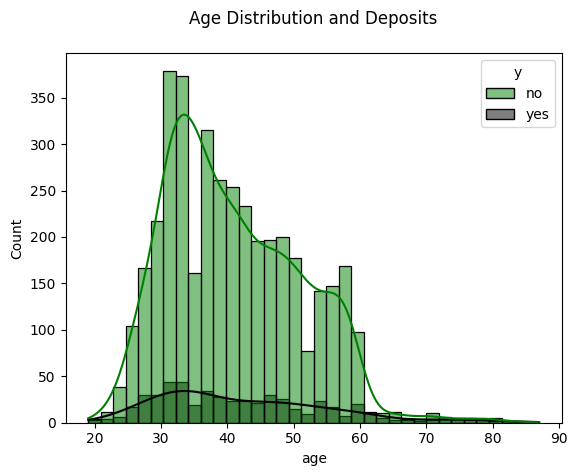

In [ ]:
#Age distribution
sns.histplot(x="age", data=data1, kde=True, hue= "y", palette = ["green","black"])
plt.title("Age Distribution and Deposits\n")
plt.show()

**Observation**   

* Most customers are between 20 and 60 years old.
* There's a peak around 30-40 years old for those who made deposits.
* The proportion of customers who made deposits seems to be higher in younger age groups and decreases somewhat with age.


Therefore ages does have relationship with whether a customer makes a deposit or not


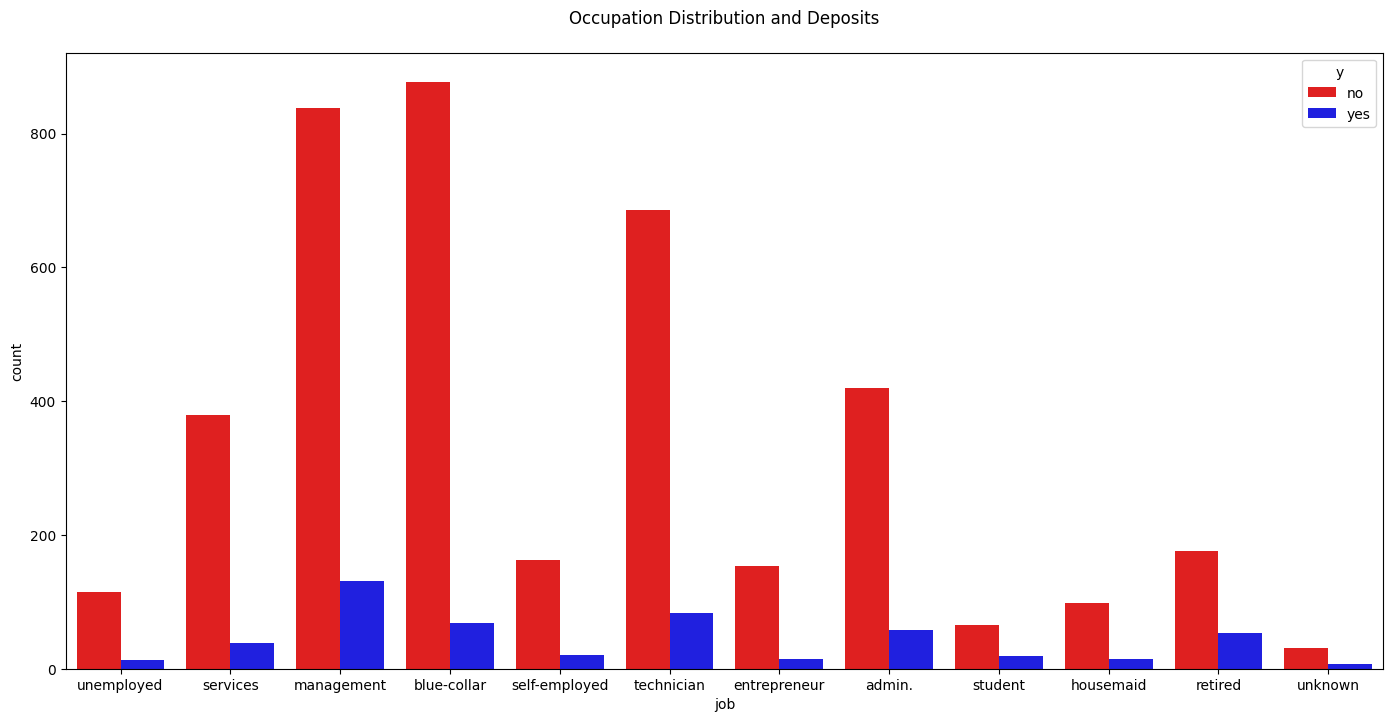

In [ ]:
#Occupation distribution
plt.figure(figsize=(17,8))
sns.countplot(x="job", data= data1, hue ="y", palette = ["red","blue"])
plt.title("Occupation Distribution and Deposits\n")
plt.show()

The color distribution shows that customers in occupations like "management", "technician", "admin", "retired","student", and "housemaid" are more likely to make deposits (blue bars), while those in "blue-collar", "entrepreneur", and "unknown" occupations are less likely (red bars).

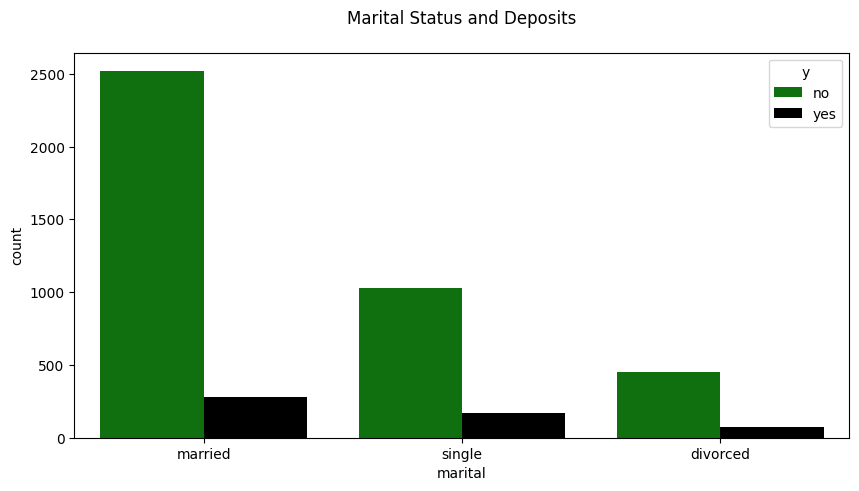

In [ ]:
#Marital Status Distribution

plt.figure(figsize=(10,5))
sns.countplot(x="marital", data= data1, hue ="y", palette = ["green","black"])
plt.title("Marital Status and Deposits\n")
plt.show()

There might be a link between marital status and deposit behavior, possibly due to differences in income, financial needs, or life stages.
Marketing campaigns could be tailored to specific marital groups, emphasizing relevant products or services that align with their financial goals and circumstances.

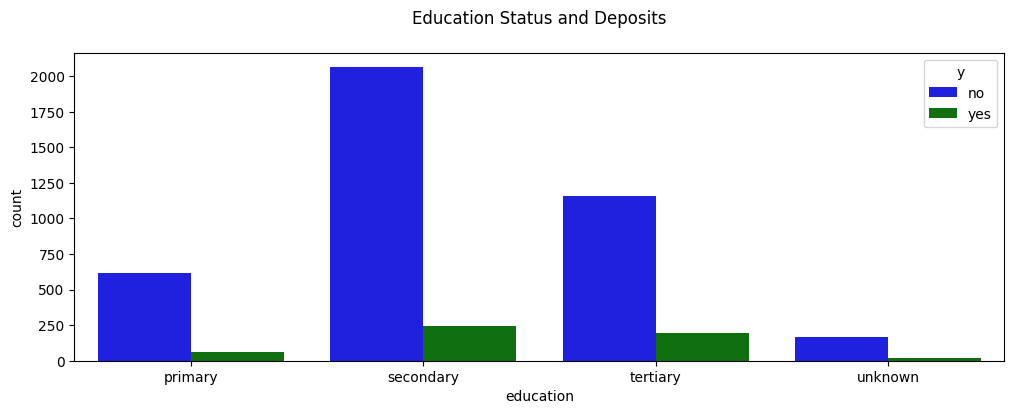

In [ ]:
#Education Status Distribution


plt.figure(figsize=(12,4))
sns.countplot(x="education", data= data1, hue ="y", palette = ["blue","green"])
plt.title("Education Status and Deposits\n")
plt.show()

Education level is a factor influencing customer deposit behavior, possibly due to differences in income, financial literacy, or career opportunities.
Marketing strategies could be tailored to specific education groups, highlighting products or services that align with their financial needs and goals.

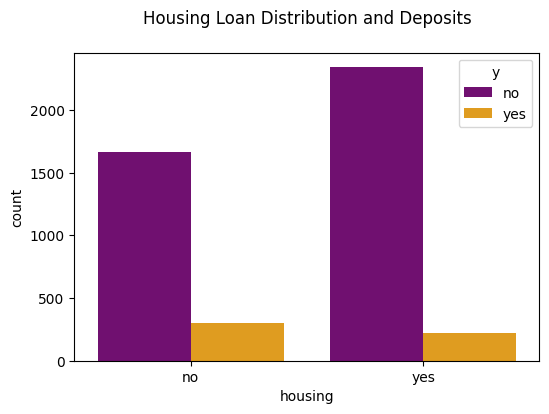

In [ ]:
#Housing Loan Distribution

plt.figure(figsize=(6,4))
sns.countplot(x="housing", data=data1, hue="y", palette=["purple", "orange"])
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()



From the chart, the individuals without a housing loan ("no") are more likely to make deposits (taller purple bar) compared to those with a housing loan ("yes").

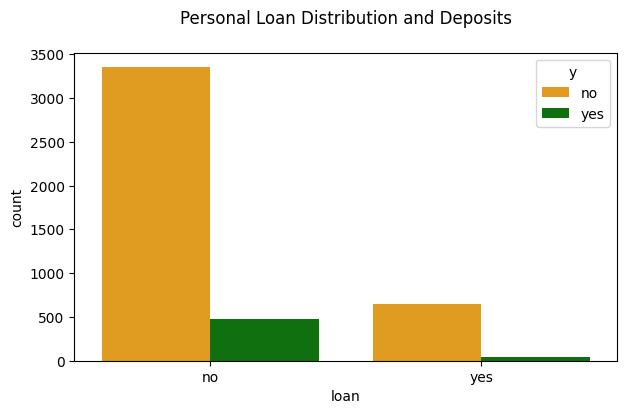

In [ ]:
#Personal Loan Distribution


plt.figure(figsize=(7,4))
sns.countplot(x="loan", data= data1, hue ="y", palette = ["orange","green"])
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

From the chart, the individuals without a personal loan ("no") are more likely to make deposits (taller green bar) compared to those with a personal loan ("yes").

In [ ]:
#Credit defaults

data1.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

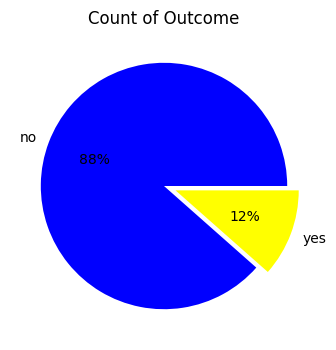

In [ ]:
# Count of Outcome
counts = data1.y.value_counts()
keys = counts.index
data = counts.values

# Custom colors for the pie chart
colors = ['blue', 'yellow']

# Create the pie chart with custom colors
plt.figure(figsize=(8, 4))
explode = [0, 0.1]
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%', colors=colors)

# Add title
plt.title('Count of Outcome')

# Show the plot
plt.show()

The pie chart shows the distribution of outcomes in the dataset, likely represented by "yes" and "no" of the deposit.



In [ ]:
#Label Encoding Categorical Features

column = data1.select_dtypes("object").columns
column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
label = LabelEncoder()

data1[column] = data1[column].apply(label.fit_transform)
data1.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


Correlation Analysis

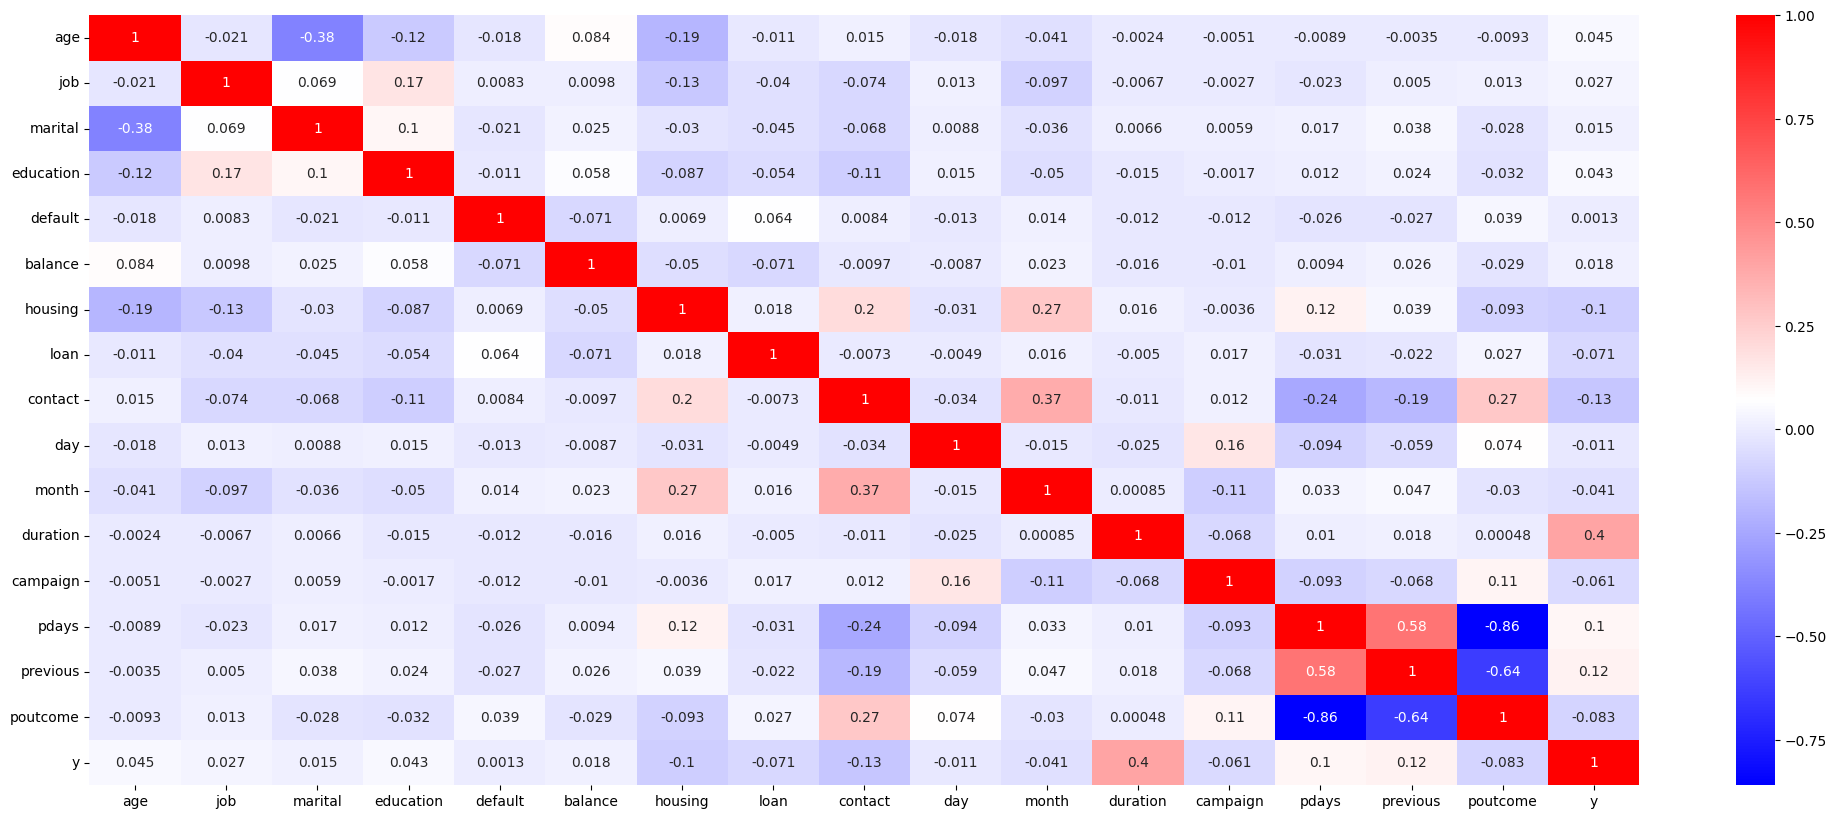

In [ ]:
#Correlation Analysis using Heatmap

plt.figure(figsize=(25,10))
sns.heatmap(data1.corr(), cmap='bwr', annot=True)
plt.show()

The heatmap displays the correlation coefficients between different numerical features in the dataset. Each cell represents the correlation between the feature represented by the row label and the feature represented by the column label.



In [ ]:
#Splitting input and output
X = data1.drop("y", axis=1)
y = data1.y

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Describe the scaled features
description = X_scaled.describe()
print(description)

                age           job       marital     education       default  \
count  4.521000e+03  4.521000e+03  4.521000e+03  4.521000e+03  4.521000e+03   
mean  -1.178737e-16  1.634515e-16 -1.665948e-16  1.575579e-16  2.750387e-18   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -2.096455e+00 -1.355057e+00 -1.914255e+00 -1.644755e+00 -1.307588e-01   
25%   -7.725828e-01 -1.047871e+00 -2.464294e-01 -3.090379e-01 -1.307588e-01   
50%   -2.052091e-01 -1.263125e-01 -2.464294e-01 -3.090379e-01 -1.307588e-01   
75%    7.404137e-01  7.952456e-01  1.421396e+00  1.026680e+00 -1.307588e-01   
max    4.333780e+00  2.023990e+00  1.421396e+00  2.362397e+00  7.647669e+00   

            balance       housing          loan       contact           day  \
count  4.521000e+03  4.521000e+03  4.521000e+03  4.521000e+03  4.521000e+03   
mean  -1.571649e-17  1.434130e-16  5.972268e-17  9.744227e-17  2.357474e-18   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.

This displays various statistics like mean, standard deviation, minimum, maximum, quartiles, etc., for each feature after standardization

Decision tree classifier

In [ ]:
#Building the Decision Tree Classifier
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)


DecisionTreeClassifier()

Splits the data into training (70%) and testing (30%) sets

Separates features (X_scaled) and target variable (y) for both sets.

Creates a DecisionTreeClassifier object.

Trains the model on the training set (train_X, train_y).

Prints the training score (1.0), indicating perfect accuracy on training data (overfitting).

In [ ]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8754605747973471


Evaluates the trained model on the testing set (test_X, test_y).

Prints the test score (0.8688), indicating good performance but not perfect.

In [ ]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8606155138280641

Gets an average score of 0.8606, consistent with the test score.

In [ ]:

ypredict = decision_tree.predict(test_X)
print(classification_report(test_y,ypredict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1209
           1       0.43      0.41      0.42       148

    accuracy                           0.88      1357
   macro avg       0.68      0.67      0.67      1357
weighted avg       0.87      0.88      0.87      1357



Predicts target labels for the testing set using predict.

Generates a classification report to analyze precision, recall, F1-score, and support for each class.

The report shows high precision (0.93) and recall (0.93) for class 0 (no default), but lower values (0.42) for class 1 (default). This suggests the model might be better at predicting non-defaulters but struggles with identifying defaulters.

In [ ]:
#Hyperparameter tunning
#Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [ ]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}

In [ ]:

gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)

In [ ]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()

0.8887500749895014

In [ ]:
#Using this best estimators to built our model.
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [ ]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9108723135271808
Test Score: 0.89240972733972


Creates a new decision tree classifier with the best hyperparameters found (clf).

Trains and evaluates the new model on the same training and testing sets.

Prints the new training score (0.914) and test score (0.893), showing slight improvement.

In [ ]:
pred_y = clf.predict(test_X)

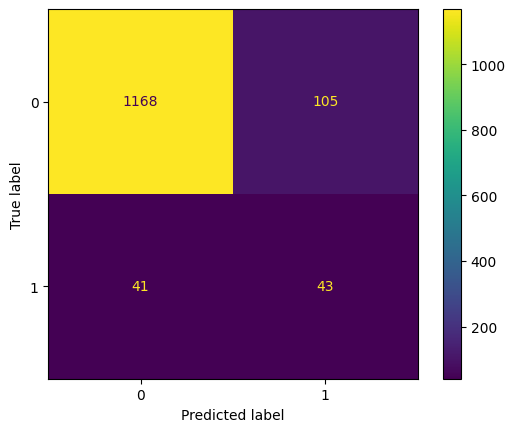

In [ ]:
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

Generates a confusion matrix (cm) comparing predicted and actual labels (visualized in the image).

The confusion matrix confirms the previous observation about higher accuracy for non-defaulters (class 0) and lower accuracy for defaulters (class 1).

In [ ]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1273
           1       0.29      0.51      0.37        84

    accuracy                           0.89      1357
   macro avg       0.63      0.71      0.66      1357
weighted avg       0.92      0.89      0.91      1357



In [ ]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 89.240972733972


In [ ]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  90.49299978293901


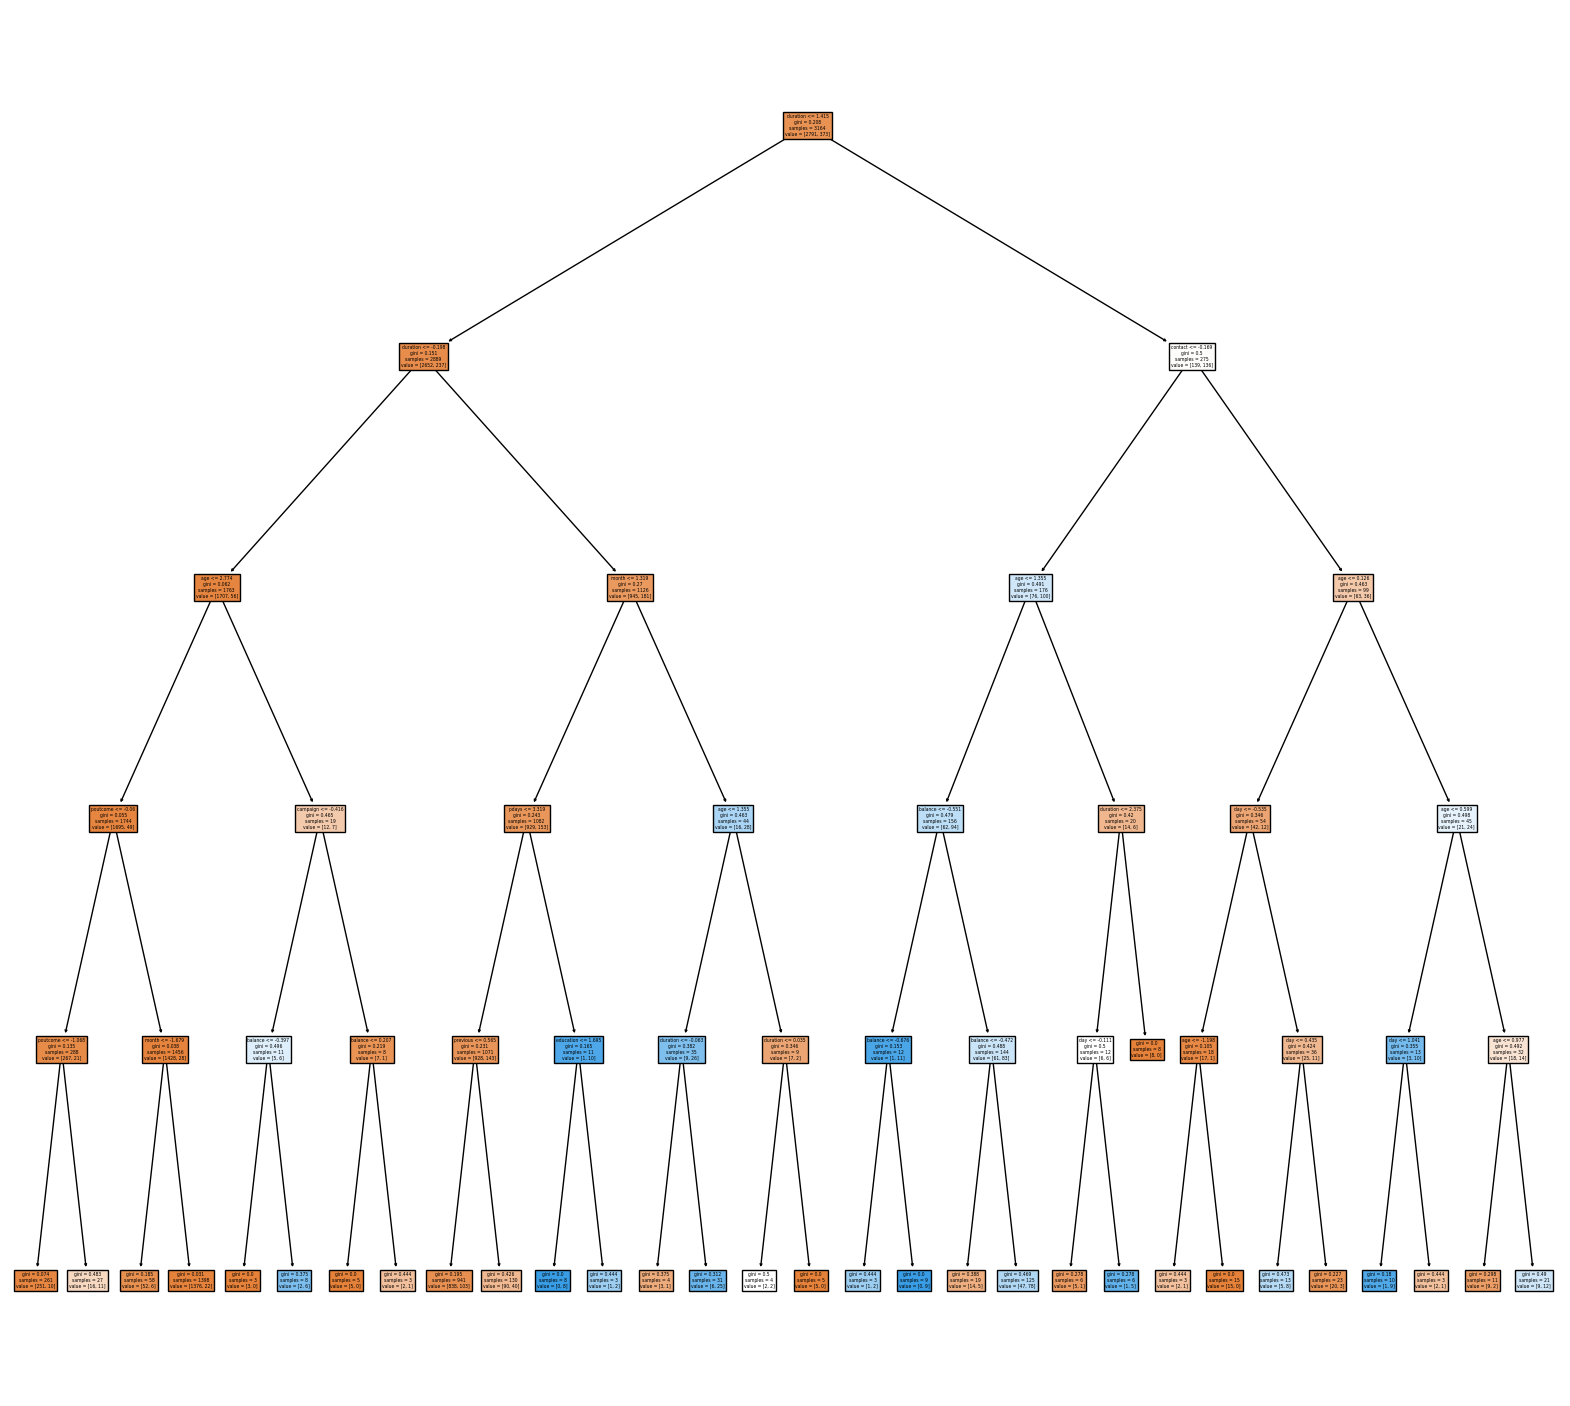

In [ ]:
from sklearn import tree

# Convert the Index object to a list
feature_names = list(X.columns)

# Plot the decision tree
fig = plt.figure(figsize=(20, 18))
t = tree.plot_tree(clf, filled=True, feature_names=feature_names)

# Show the plot
plt.show()

* The output is a visual representation of the decision tree structure.

* It shows how the tree splits the data based on feature values to reach decisions (predictions).

* Nodes represent decision points, branches represent splits, and leaves represent final predictions.

* Color-coding (if enabled) indicates the majority class in each leaf node.

* Feature names (if provided) label nodes to make the decision process understandable



**Conclusion**

The decision tree classifier shows promising potential for predicting credit defaults, especially for non-defaulters. By addressing class imbalance, avoiding overfitting, and considering alternative models, we can potentially improve the model's accuracy and reliability in identifying defaulters, leading to better risk management and marketing decisions. Remember that no model is perfect, and continuous evaluation and improvement are crucial for real-world applications.